<a href="https://colab.research.google.com/github/san0369/VLG_OPEN_PROJECT/blob/main/VLG_OP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARIMA MODEL**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
P_data = pd.read_csv("/content/CUR-INR (1).csv")
P_data.head(20)

,DATE,RATE
0,2016-12-31,67.966900
1,2016-12-30,67.972800
2,2016-12-29,67.945000
3,2016-12-28,68.228900
4,2016-12-27,67.996500
5,2016-12-26,67.760000
6,2016-12-25,67.840800
7,2016-12-24,67.842300
8,2016-12-23,67.840000
9,2016-12-22,67.882500


In [ ]:
#Checking for non-availability of Data
P_data.isna().sum()

P_data.index = pd.to_datetime(P_data.DATE)
P2_data = P_data["2013-01-01":"2014-1-3"]
P2_data.drop(columns = ['DATE'],inplace = True)
P2_data = P2_data[::-1]
P2_data.head()

<ipython-input-2-ba8caeeaa83b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P2_data.drop(columns = ['DATE'],inplace = True)


,RATE
DATE,
2013-01-01,54.712303
2013-01-02,54.442367
2013-01-03,54.447983
2013-01-04,54.718133
2013-01-05,54.812203


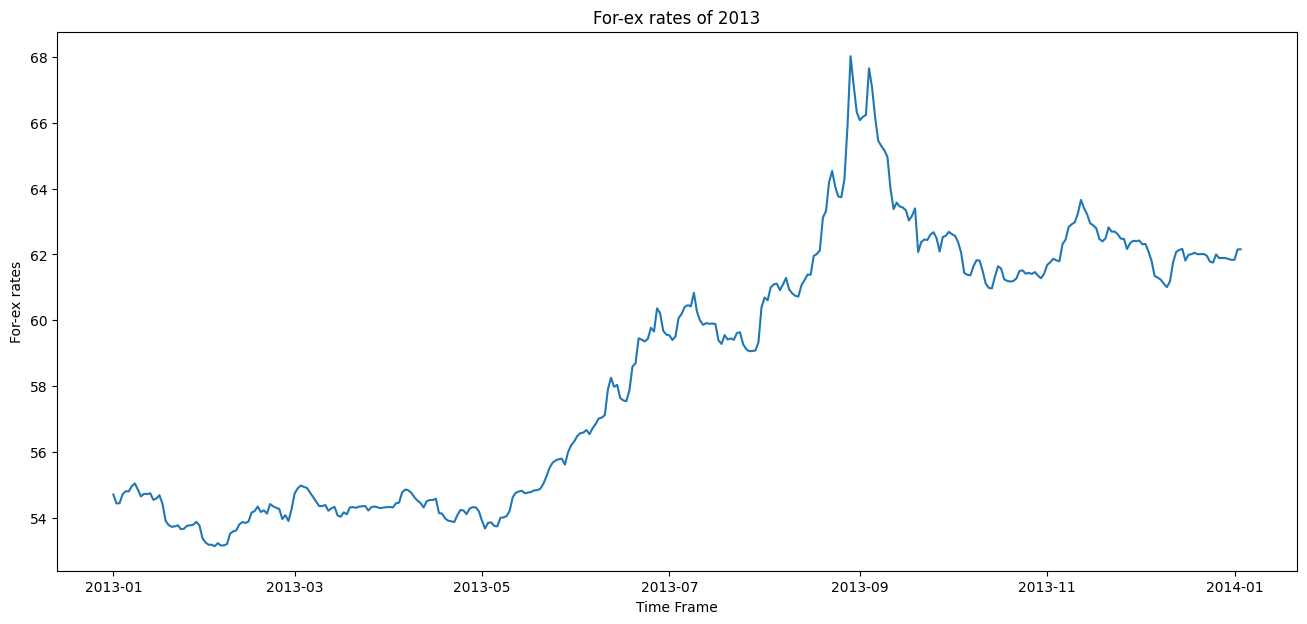

In [ ]:
# Plotting the data
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
plt.title('For-ex rates of 2013')
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('For-ex rates')
ax1.plot(P2_data)

In [ ]:
# Checking Stationarity ( Necessary for appling TSA algorithms )

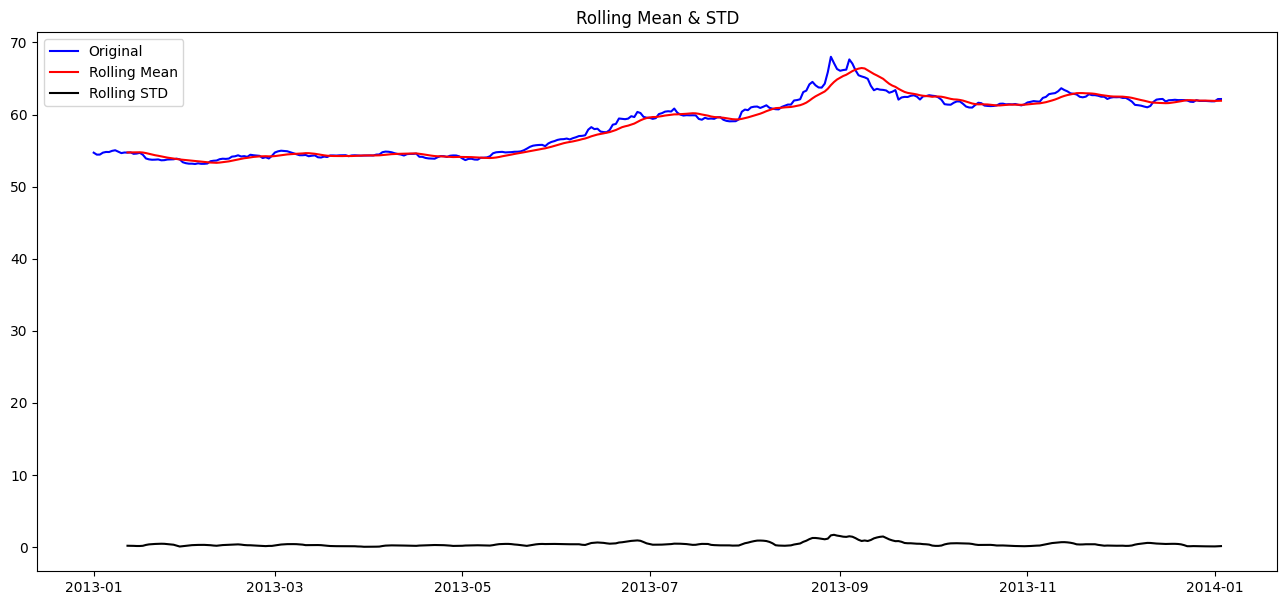

In [ ]:
# Determining Rolling Statistics
rollmean = P2_data.rolling(12).mean()
rollstd = P2_data.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

orig = plt.plot(P2_data, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling STD')
plt.legend(loc = 'best')
plt.title('Rolling Mean & STD')
plt.show(block =False)

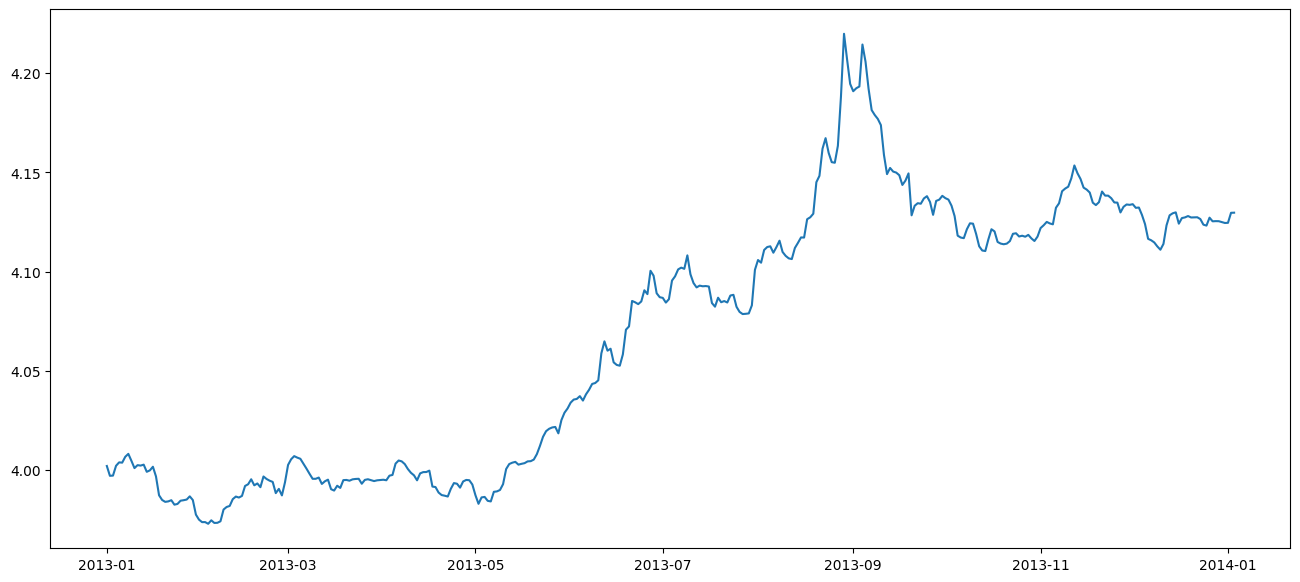

In [ ]:
# Making Series Stationary
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
t_log = np.log(P2_data)
plt.plot(t_log)

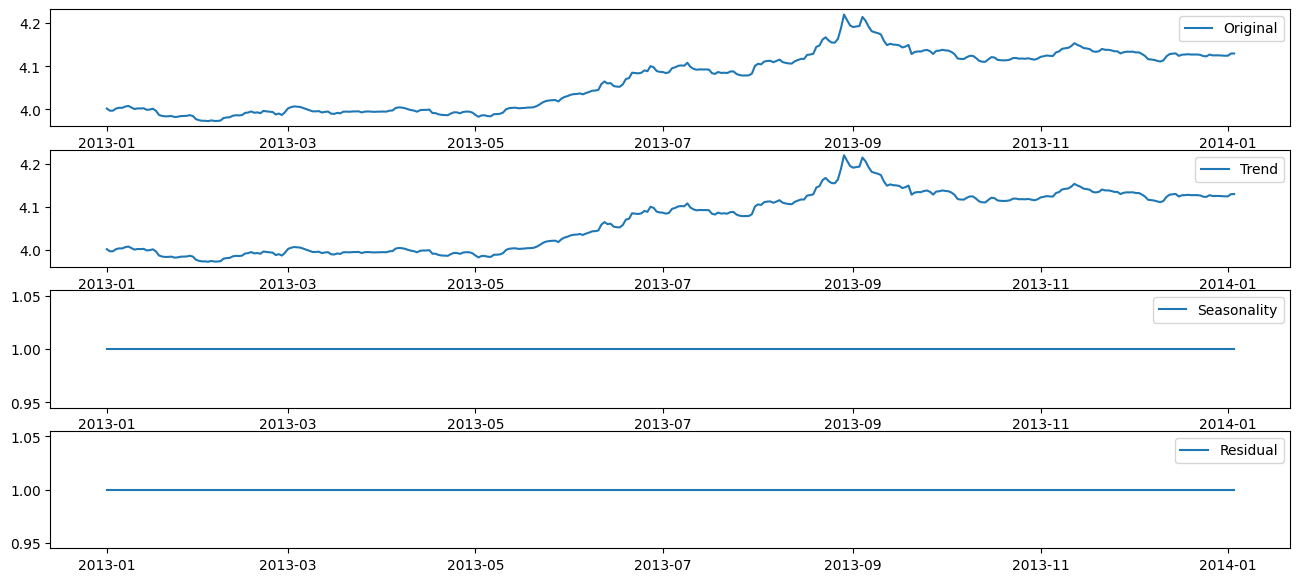

In [ ]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(t_log,period=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(t_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


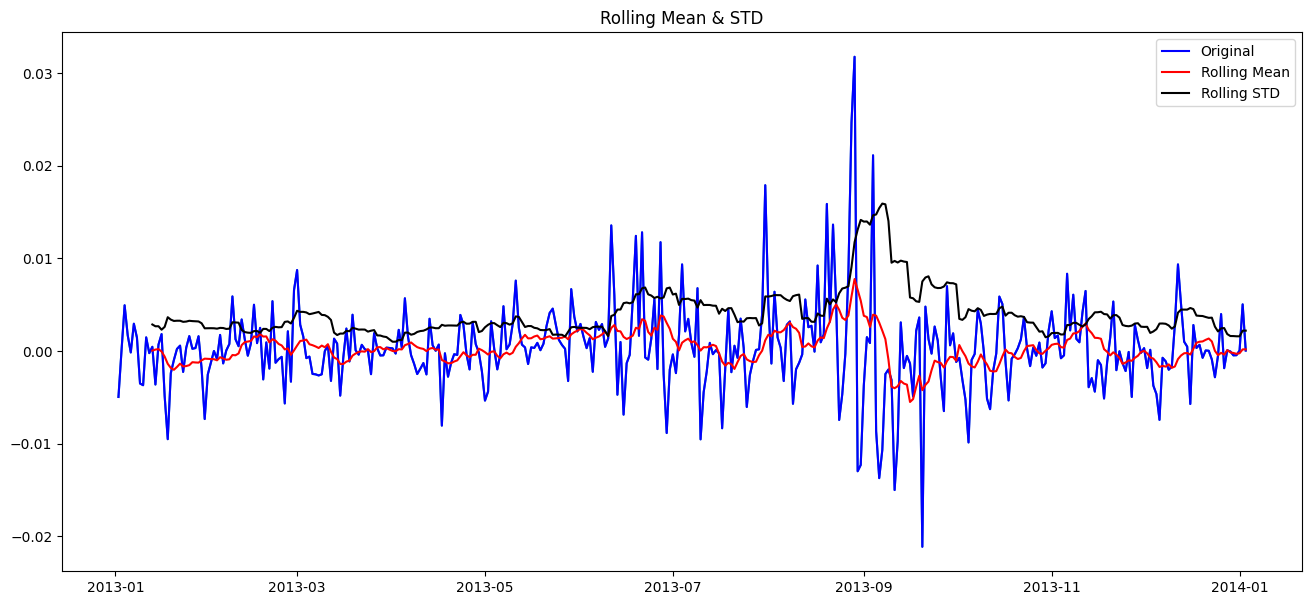

In [ ]:
# Differentiating
plt.figure(figsize=(16,7))
fig = plt.figure(1)
t_log_diff = t_log - t_log.shift()
plt.plot(t_log_diff)

# Determining rolling statistics
rollmean = t_log_diff.rolling(12).mean()
rollstd = t_log_diff.rolling(12).std()

# Plot rolling statistics:
orig = plt.plot(t_log_diff, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title("Rolling Mean & STD")
plt.show(block = False)

In [ ]:
# # ADFULLER TEST FOR STATIONARITY
t_log_diff.dropna(inplace=True)
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(t_log_diff.RATE, autolag='AIC')

print(f'p-value: {adfuller_result[1]}')

p-value: 1.436106769659044e-08


In [ ]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(t_log_diff,nlags = 20)
lag_pacf = pacf(t_log_diff,nlags = 20)

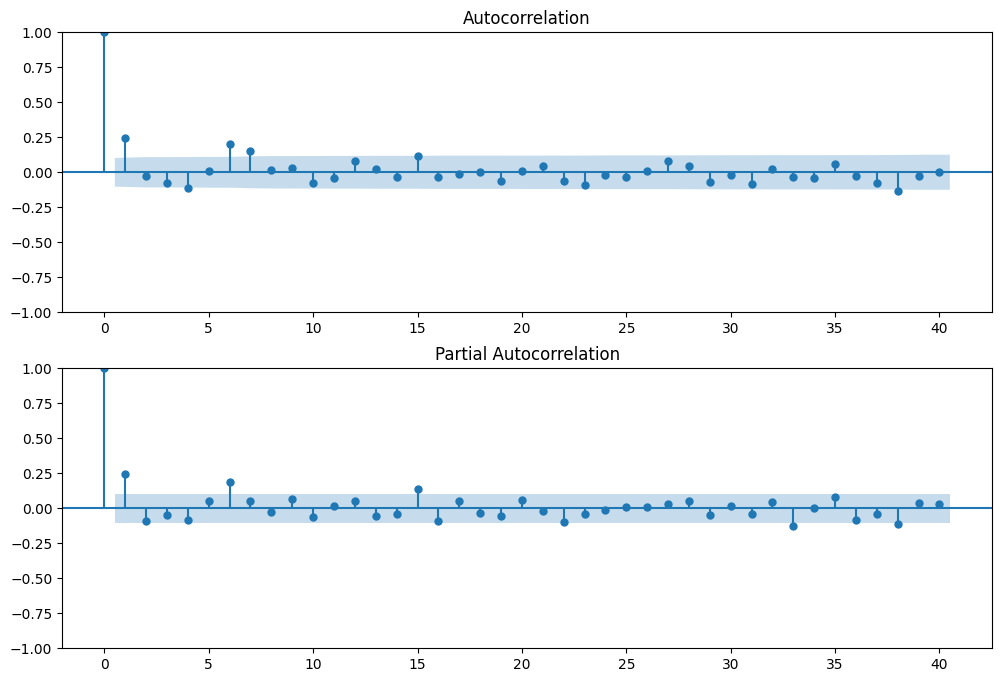

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(t_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(t_log_diff.dropna(),lags=40,ax=ax2)

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(t_log_diff, trace=True,suppress_warnings=True)
stepwise_fit.summary()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.2 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2876.968, Time=1.71 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2860.464, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2881.323, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2883.857, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2860.566, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2881.854, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2881.843, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2879.840, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2884.635, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2882.616, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-2882.601, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2882.210, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2880.601, Time=0.16 sec

Best m

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(0, 0, 1)   Log Likelihood                1444.318
Date:                Fri, 19 Jan 2024   AIC                          -2884.635
Time:                        04:24:47   BIC                          -2876.830
Sample:                             0   HQIC                         -2881.534
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2690      0.025     10.607      0.000       0.219       0.319
sigma2      2.184e-05   7.64e-07     28.585      0.000    2.03e-05    2.33e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               805.64
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


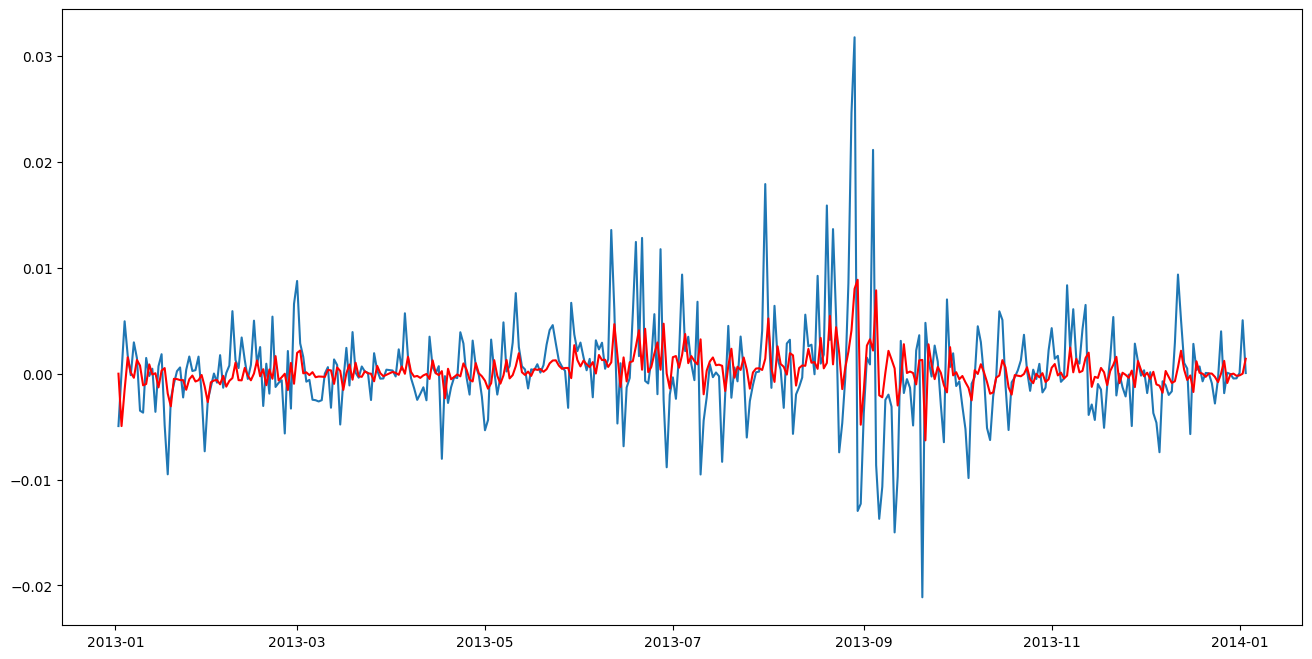

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(16,8))
model = ARIMA(t_log_diff,order=(3,1,1))
results_ARIMA = model.fit()
plt.plot(t_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.savefig("ARIMA_TRUE.pdf")

In [ ]:
print (t_log.tail())

                RATE
DATE                
2013-12-30  4.124920
2013-12-31  4.124483
2014-01-01  4.124556
2014-01-02  4.129603
2014-01-03  4.129665


In [ ]:
ARIMA_diff_prediction = pd.Series(results_ARIMA.fittedvalues,copy = True)
ARIMA_diff_prediction["2013-1-2"]=3.997143
print(ARIMA_diff_prediction)

DATE
2013-01-02    3.997143
2013-01-03   -0.004946
2013-01-04   -0.001511
2013-01-05    0.001543
2013-01-06    0.000113
                ...   
2013-12-30    0.000006
2013-12-31   -0.000197
2014-01-01   -0.000160
2014-01-02   -0.000002
2014-01-03    0.001410
Length: 366, dtype: float64


In [ ]:
ARIMA_diff_prediction_cumsum = ARIMA_diff_prediction.cumsum()
print(ARIMA_diff_prediction_cumsum)
print(t_log)

DATE
2013-01-02    3.997143
2013-01-03    3.992197
2013-01-04    3.990686
2013-01-05    3.992229
2013-01-06    3.992342
                ...   
2013-12-30    4.106884
2013-12-31    4.106686
2014-01-01    4.106526
2014-01-02    4.106524
2014-01-03    4.107934
Length: 366, dtype: float64
                RATE
DATE                
2013-01-01  4.002089
2013-01-02  3.997143
2013-01-03  3.997246
2013-01-04  4.002195
2013-01-05  4.003913
...              ...
2013-12-30  4.124920
2013-12-31  4.124483
2014-01-01  4.124556
2014-01-02  4.129603
2014-01-03  4.129665

[367 rows x 1 columns]


In [ ]:
# ARIMA_log_prediction = pd.Series(t_log.iloc[0], index=t_log.index)
# ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_prediction_cumsum,fill_value=0)
# ARIMA_log_prediction.head()

In [ ]:
forecast_days = 91
pred = results_ARIMA.get_prediction(start =pd.to_datetime('2014-01-01'),end=results_ARIMA.nobs + 28 - 1)
N_data = P_data["2014-1-1":"2014-1-31"]
N_data.drop(columns = ['DATE'],inplace = True)
N_data = N_data[::-1]
# pred[366] = 4.154282
# prediction = pred.cumsum()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-18-72640f5427db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N_data.drop(columns = ['DATE'],inplace = True)


In [ ]:
predictions = pred.predicted_mean
predictions[363] = 4.124396
predictions = predictions.cumsum()
predictions.head()

363    4.124396
364    4.124394
365    4.125804
366    4.125439
367    4.125139
Name: predicted_mean, dtype: float64

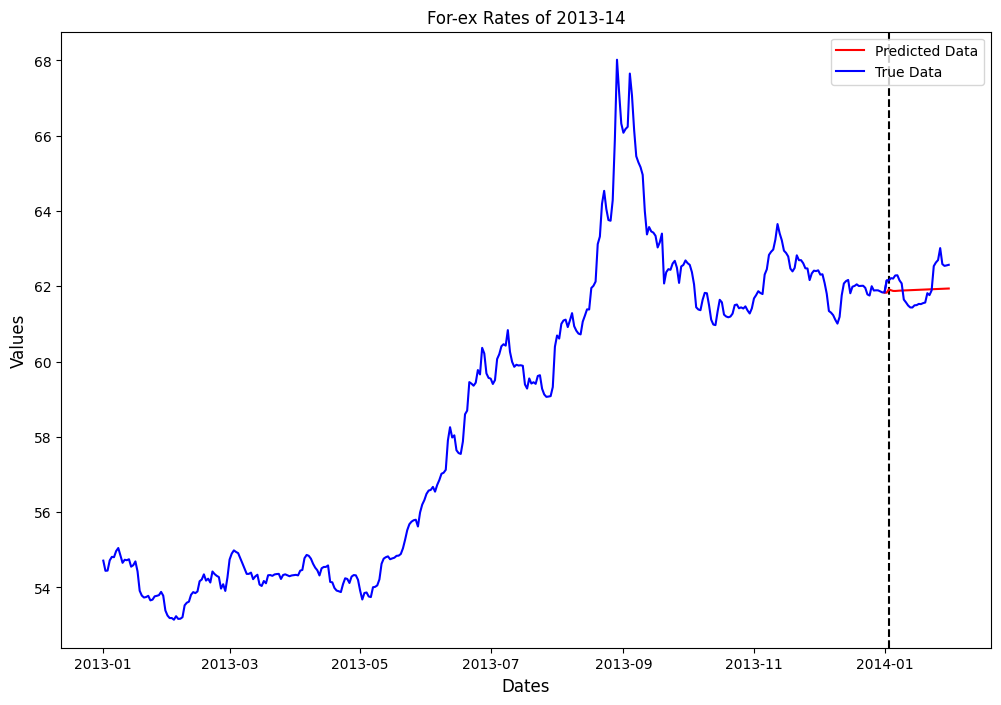

In [ ]:
predictions.index = N_data.index
plt.figure(figsize=(12,8))
plt.title("For-ex Rates of 2013-14")
plt.plot(P2_data["2013-01-01":"2014-1-31"],color = 'blue')
plt.axvline(x=P2_data.index[366], color='black', linestyle='--')
plt.plot(np.exp(predictions),color = 'red',label="Predicted Data")
plt.plot(N_data,color='blue',label='True Data')
plt.legend(loc="upper right")
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.savefig('ARIMA_PRED.pdf')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(np.exp(predictions),N_data))
print("MAE : ", mean_absolute_error(np.exp(predictions),N_data))

MSE :  0.21542380532234595
MAE :  0.40727181229826626


# **GARCH MODEL**

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 7.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

In [ ]:
F_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CUR-INR (1).csv")
F_data.head(20)

,DATE,RATE
0,2016-12-31,67.966900
1,2016-12-30,67.972800
2,2016-12-29,67.945000
3,2016-12-28,68.228900
4,2016-12-27,67.996500
5,2016-12-26,67.760000
6,2016-12-25,67.840800
7,2016-12-24,67.842300
8,2016-12-23,67.840000
9,2016-12-22,67.882500


In [ ]:
F_data.index = pd.to_datetime(F_data.DATE)
F_data = F_data["2013-01-01":"2013-12-31"]
F_data.drop(columns = ['DATE'],inplace = True)
F_data.head(20)

,RATE
DATE,
2013-12-31,61.83584
2013-12-30,61.86286
2013-12-29,61.89094
2013-12-28,61.89299
2013-12-27,61.88750
2013-12-26,62.00138
2013-12-25,61.75392
2013-12-24,61.78381
2013-12-23,61.95796


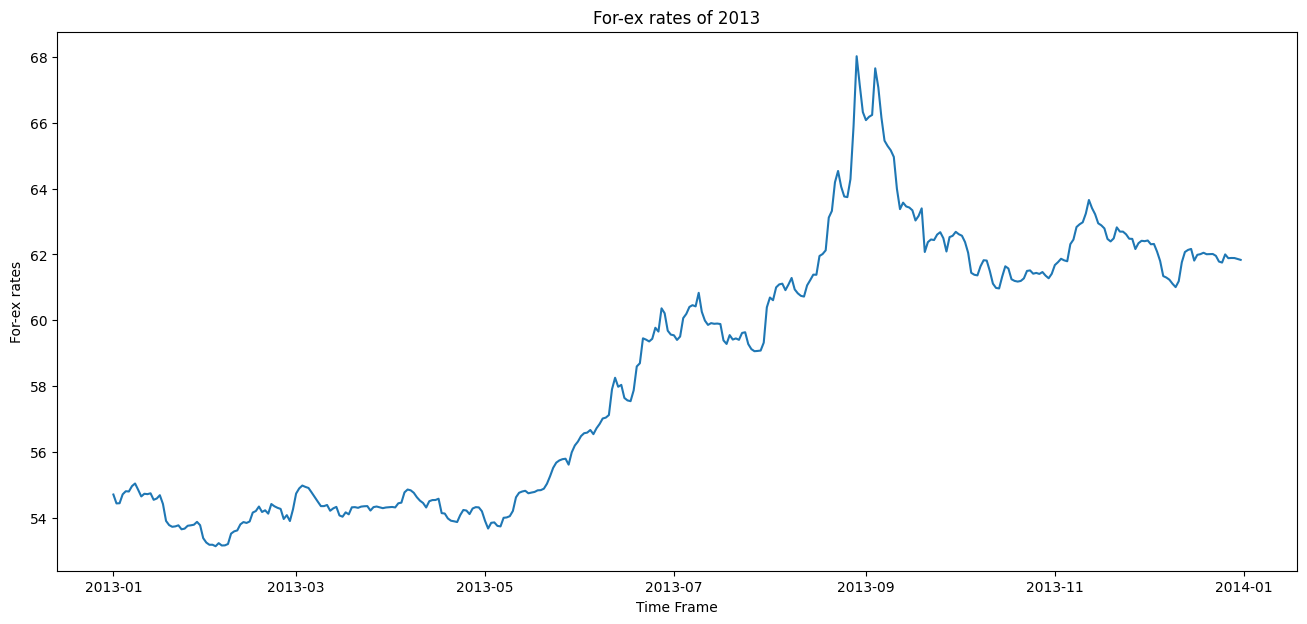

In [ ]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
plt.title('For-ex rates of 2013')
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('For-ex rates')
ax1.plot(F_data)

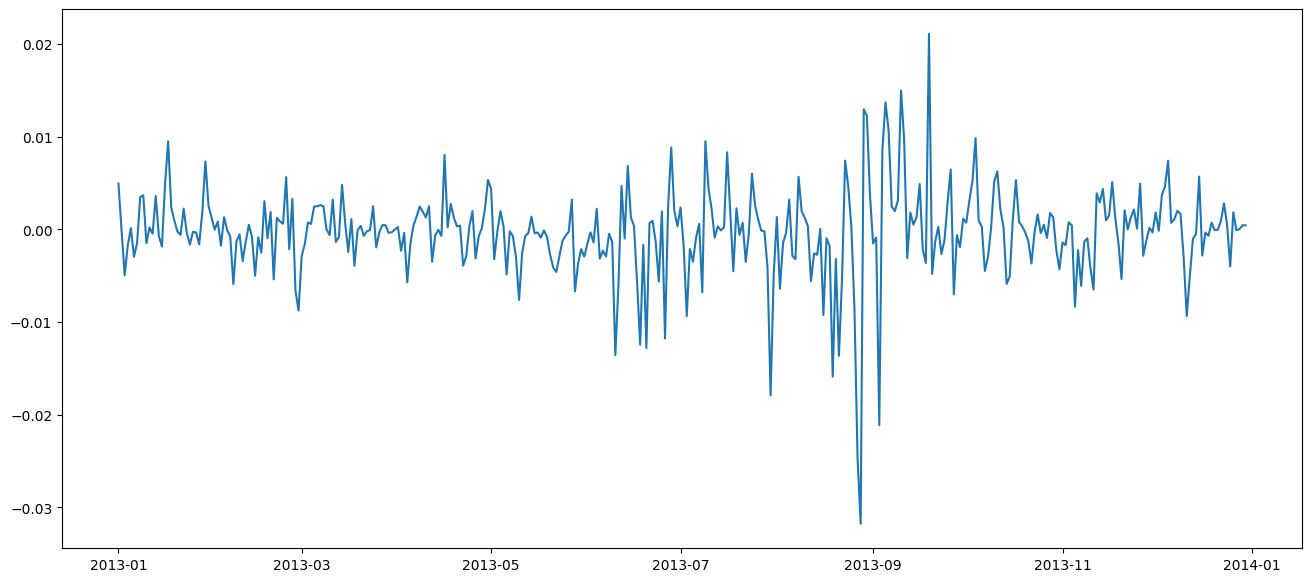

In [ ]:
# Preparing data to apply garch model.
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
F_log = np.log(F_data)
F_log_diff = F_log - F_log.shift()
plt.plot(F_log_diff)

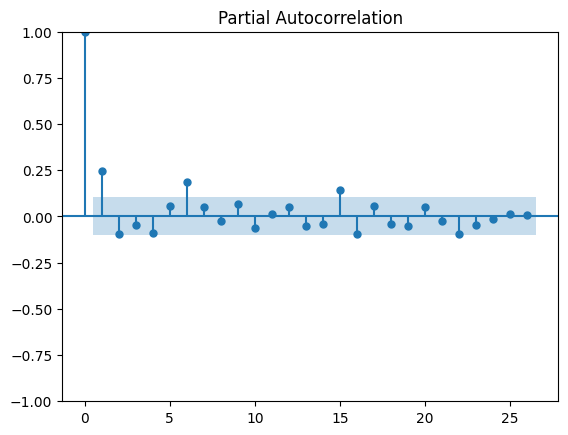

In [ ]:
plot_pacf((F_log_diff).dropna())
plt.show()

In [ ]:
F_log_diff.dropna(inplace=True)
model = arch_model((F_log_diff*100),p=2,q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1977.1376271557551
Iteration:      2,   Func. Count:     15,   Neg. LLF: 631.0910745218073
Iteration:      3,   Func. Count:     24,   Neg. LLF: 16645.482521282498
Iteration:      4,   Func. Count:     30,   Neg. LLF: 390.76475880174763
Iteration:      5,   Func. Count:     37,   Neg. LLF: 64251.34120184086
Iteration:      6,   Func. Count:     43,   Neg. LLF: 217.41111430533425
Iteration:      7,   Func. Count:     49,   Neg. LLF: 199.43891237760988
Iteration:      8,   Func. Count:     54,   Neg. LLF: 198.9588823798519
Iteration:      9,   Func. Count:     59,   Neg. LLF: 198.70128427457973
Iteration:     10,   Func. Count:     64,   Neg. LLF: 198.5917210340525
Iteration:     11,   Func. Count:     69,   Neg. LLF: 198.58755571434898
Iteration:     12,   Func. Count:     74,   Neg. LLF: 198.58672324992168
Iteration:     13,   Func. Count:     79,   Neg. LLF: 198.58669629946925
Iteration:     14,   Func. Count:     83,   Neg. LLF: 1

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   RATE   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -198.587
Distribution:                  Normal   AIC:                           405.173
Method:            Maximum Likelihood   BIC:                           420.751
                                        No. Observations:                  363
Date:                Fri, Jan 19 2024   Df Residuals:                      362
Time:                        04:36:02   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0119  2.188e-02     -0.544      0.587 [-5.479e-02,3.100e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0918  1.968e-02      4.663  3.116e-06  [5.320e-02,  0.130]
alpha[1]       0.7851      0.365      2.151  3.146e-02  [6.980e-02,  1.500]
alpha[2]       0.0678  6.593e-02      1.028      0.304 [-6.144e-02,  0.197]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
predictions = []
test_size = 363
for i in range(test_size):
    train = (F_log_diff[-(test_size-i):])*1000
    model = arch_model(train,p=2,q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
# preds = model_fit.forecast(horizon=test_size)
# predictions = np.sqrt(preds.variance.values[-1,:][0])


/usr/local/lib/python3.10/dist-packages/arch/univariate/volatility.py:1197: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.mean(resids**2) / (target ** (2.0 / power))
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: invalid value encountered in add
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.

In [ ]:
predictions = pd.Series(predictions,index = F_log_diff.index[-363:])
predictions

DATE
2013-12-30    5.414696
2013-12-29    5.409335
2013-12-28    5.403505
2013-12-27    5.394374
2013-12-26    5.391843
                ...   
2013-01-05    2.270116
2013-01-04    0.535983
2013-01-03    0.067617
2013-01-02    2.524480
2013-01-01    0.000000
Length: 363, dtype: float64

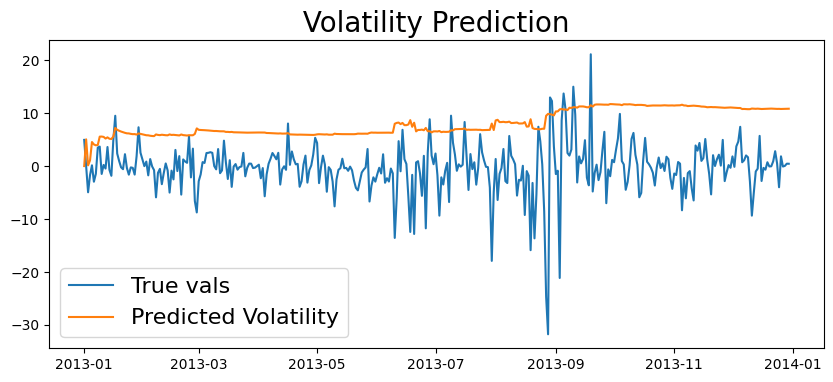

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(F_log_diff[-364:]*1000)
preds, = plt.plot(predictions*2)
plt.title(' Volatility Prediction ',fontsize=20)
plt.legend(['True vals','Predicted Volatility'],fontsize=16)
plt.savefig("GARCH_VOL.pdf")